In [17]:
import os
import parse
import fasttext
import numpy as np
from sklearn.metrics import f1_score
from sklearn.dummy import DummyClassifier


datadir = "/home/peterr/macocu/task5_webgenres/data/final/fasttext1"


def parse_test_file(path: str):
    """Reads fasttext formatted file and returns labels, texts."""
    with open(path, "r") as f:
        content = f.readlines()
    pattern = "{label} {text}\n"
    p = parse.compile(pattern)

    labels, texts = list(), list()
    for line in content:
        rez = p.parse(line)
        if rez is not None:
            labels.append(rez["label"])
            texts.append(rez["text"])
    return labels, texts

def prediction_to_label(prediction):
    """Transforms predicitons as returned by fasttext into pure labels."""
    import numpy as np
    return np.array(prediction[0])[:, 0]

def plot_cm(y_true, y_pred, labels, save=False, title=None):
    from sklearn.metrics import confusion_matrix
    from sklearn.metrics import f1_score
    import matplotlib.pyplot as plt
    cm = confusion_matrix(y_true, y_pred, labels=labels, )
    plt.figure(figsize=(9, 9))
    plt.imshow(cm, cmap="Oranges")
    classNames = labels
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    tick_marks = np.arange(len(classNames))
    plt.xticks(tick_marks, classNames, rotation=90)
    plt.yticks(tick_marks, classNames)
    microF1 = f1_score(y_true, y_pred, labels=labels, average ="micro")
    macroF1 = f1_score(y_true, y_pred, labels=labels, average ="macro")

    print(f"{microF1=:0.4}")
    print(f"{macroF1=:0.4}")

    metrics = f"{microF1=:0.4}, {macroF1=:0.4}"
    if title:
        plt.title(title +";\n" + metrics)
    else:
        plt.title(metrics)
    plt.tight_layout()
    if save:
        plt.savefig(save)
    plt.show()
    return microF1, macroF1


all_labels = [
 '__label__Promotion_of_Services',
 '__label__Instruction',
 '__label__Review',
 '__label__Information/Explanation',
 '__label__Promotion_of_a_Product',
 '__label__News/Reporting',
 '__label__Promotion',
 '__label__Announcement',
 '__label__Invitation',
 '__label__Opinion/Argumentation',
 '__label__Forum',
 '__label__Legal/Regulation',
 '__label__Other',
 '__label__Opinionated_News',
 '__label__Call',
 '__label__List_of_Summaries/Excerpts']


test_full = os.path.join(datadir, "test_onlykeep_False_onlyprimary_True_dedup_False.fasttext")
test_dd = os.path.join(datadir, "test_onlykeep_False_onlyprimary_True_dedup_True.fasttext")
train_full = os.path.join(datadir, "train_onlykeep_False_onlyprimary_True_dedup_False.fasttext")
train_dd = os.path.join(datadir, "train_onlykeep_False_onlyprimary_True_dedup_True.fasttext")

microF1=0.0668
macroF1=0.06116


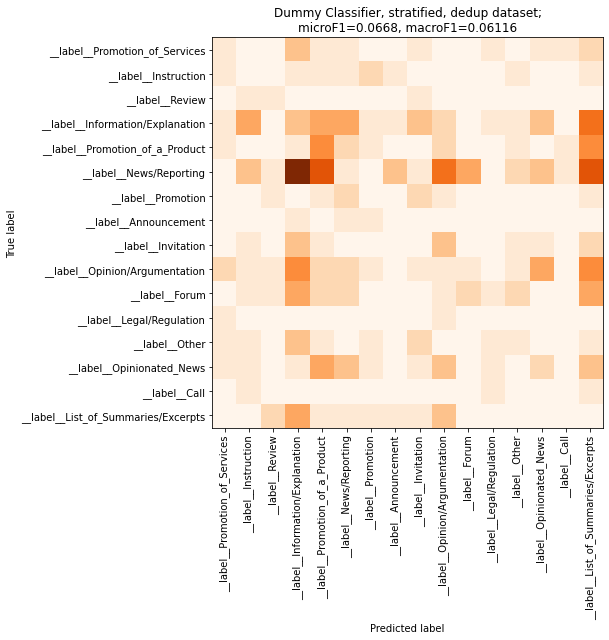

microF1=0.06544
macroF1=0.03683


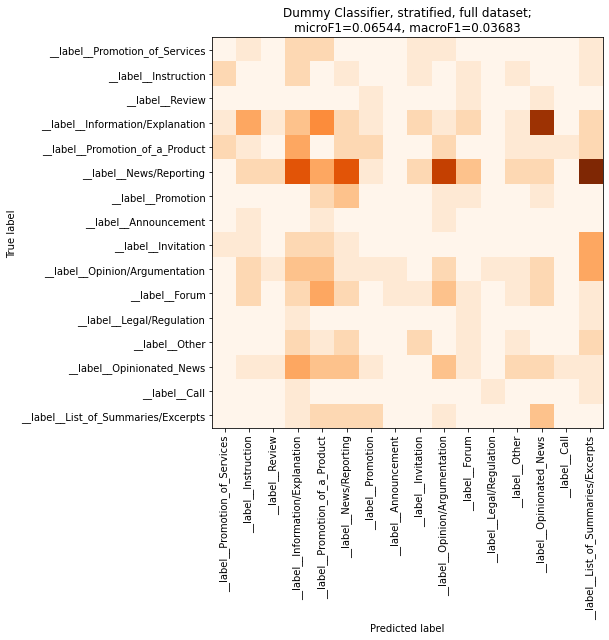

microF1=0.1379
macroF1=0.01515


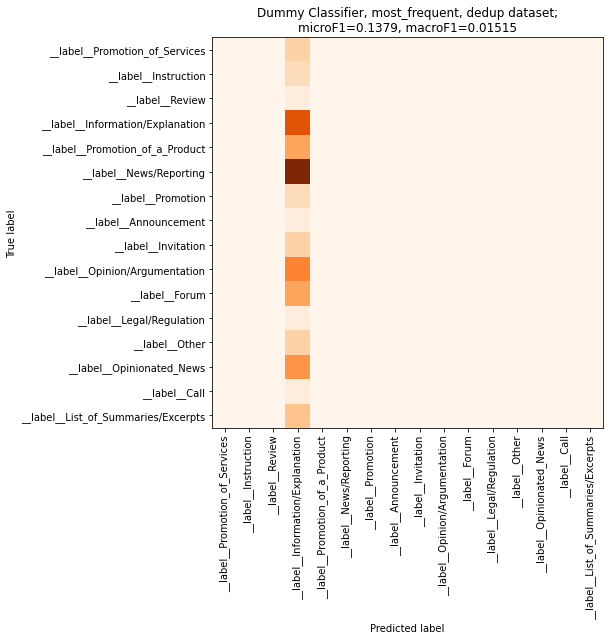

microF1=0.1429
macroF1=0.01562


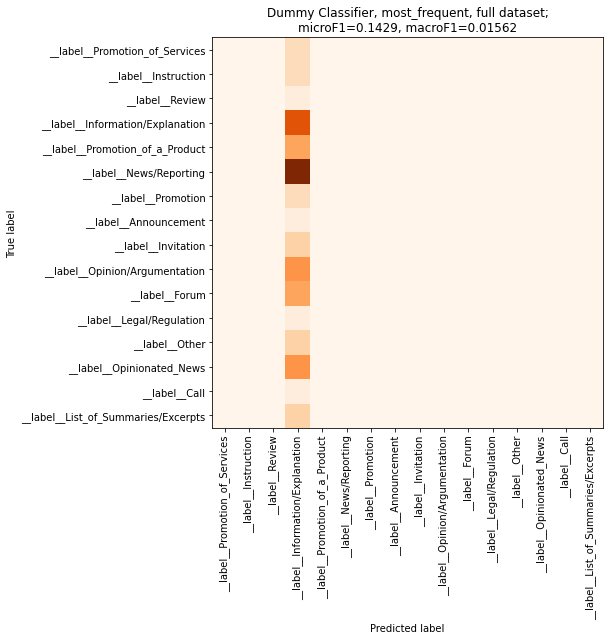

In [21]:
for strategy in ["stratified", "most_frequent"]:
    for test, train, wording in zip([test_full, test_dd], [train_full, train_dd], ["dedup", "full"]) :
        y_true, X_test = parse_test_file(test)
        y_train, X_train = parse_test_file(train)
        clf = DummyClassifier(strategy=strategy)
        clf.fit(X_train, y_train)
        y_pred = clf.predict(X_test)
        imagedir = "/home/peterr/macocu/task5_webgenres/images"
        plot_cm(y_true, y_pred, all_labels, 
        save=imagedir+f"/Dummy_stratified_{wording}_{strategy}.png", 
        title=f"Dummy Classifier, {strategy}, {wording} dataset")